In [1]:
import json
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#import dataset
zippedData = ['tmdb.movies.csv.gz']

In [3]:
#make dataframe
tmdb_movies = pd.read_csv("zippedData/{}".format(zippedData[0]))
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
#formatting
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], format='%Y-%m-%d')

In [5]:
#sort out movies produced prior to 2000
movies_recent = tmdb_movies[tmdb_movies['release_date'] >= datetime.datetime(2000, 1, 1)]
movies_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26398 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26398 non-null  int64         
 1   genre_ids          26398 non-null  object        
 2   id                 26398 non-null  int64         
 3   original_language  26398 non-null  object        
 4   original_title     26398 non-null  object        
 5   popularity         26398 non-null  float64       
 6   release_date       26398 non-null  datetime64[ns]
 7   title              26398 non-null  object        
 8   vote_average       26398 non-null  float64       
 9   vote_count         26398 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [6]:
movies_recent['vote_count'].agg(['mean','median','min','max'])

mean        189.579059
median        5.000000
min           1.000000
max       22186.000000
Name: vote_count, dtype: float64

In [7]:
#remove irrelavent movies
movies_recent = movies_recent[movies_recent['vote_count'] >= 1000]

In [8]:
movies_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 0 to 24231
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1076 non-null   int64         
 1   genre_ids          1076 non-null   object        
 2   id                 1076 non-null   int64         
 3   original_language  1076 non-null   object        
 4   original_title     1076 non-null   object        
 5   popularity         1076 non-null   float64       
 6   release_date       1076 non-null   datetime64[ns]
 7   title              1076 non-null   object        
 8   vote_average       1076 non-null   float64       
 9   vote_count         1076 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 92.5+ KB


In [9]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [10]:
api_key = 'fe75ad97b732bde2dcf2548165850c32'

In [11]:
#get_keys("c/Users/Daniel/Documents/Flatiron/.secret/tmdb.json")

In [12]:
response = requests.get('https://api.themoviedb.org/3/movie/76341?api_key={}'.format(api_key))

In [13]:
response.status_code

200

In [14]:
#figuring out data structure
response.json()

{'adult': False,
 'backdrop_path': '/nlCHUWjY9XWbuEUQauCBgnY8ymF.jpg',
 'belongs_to_collection': {'id': 8945,
  'name': 'Mad Max Collection',
  'poster_path': '/uuvSvLb3ntGA9B0wx2JskVDSuWi.jpg',
  'backdrop_path': '/gwYe803SFwKlCF5y71OicWHUnVD.jpg'},
 'budget': 150000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'https://www.warnerbros.com/movies/mad-max-fury-road',
 'id': 76341,
 'imdb_id': 'tt1392190',
 'original_language': 'en',
 'original_title': 'Mad Max: Fury Road',
 'overview': 'An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order.',
 'popularity': 47.066,
 'poster_path': '/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 'production_companies': [{'id': 2537,
   'logo_path': None,
   'name

In [15]:
response2 = requests.get('https://api.themoviedb.org/3/movie/12444/release_dates?iso_3166_1=US&api_key={}'.format(api_key))

In [16]:
response2.status_code

200

In [17]:
#figuring out data structure
response2.json()['results']

[{'iso_3166_1': 'US',
  'release_dates': [{'certification': 'PG-13',
    'iso_639_1': '',
    'note': '',
    'release_date': '2010-11-19T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'AU',
  'release_dates': [{'certification': 'M',
    'iso_639_1': '',
    'note': '',
    'release_date': '2010-11-13T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'PT',
  'release_dates': [{'certification': 'M/12',
    'iso_639_1': '',
    'note': 'Versão original legendada',
    'release_date': '2010-11-18T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'LT',
  'release_dates': [{'certification': '',
    'iso_639_1': '',
    'note': '2D ir IMAX',
    'release_date': '2010-11-19T00:00:00.000Z',
    'type': 1},
   {'certification': '',
    'iso_639_1': '',
    'note': '2D ir IMAX',
    'release_date': '2010-11-19T00:00:00.000Z',
    'type': 3},
   {'certification': '',
    'iso_639_1': '',
    'note': '',
    'release_date': '2016-10-23T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'TR',
  '

In [18]:
release_info = None
for country in response2.json()['results']:
    if country['iso_3166_1'] == 'US':  
        release_info = country['release_dates'][0]

In [19]:
release_info['certification']

'PG-13'

In [20]:
#list of movies to run through api
movie_ids = list(movies_recent['id'])

In [21]:
#use api to get mpaa ratings
def getrating(movies):
    all_ratings=[]
    for movie in movies:
        rating = {}
        uri = 'https://api.themoviedb.org/3/movie/{}/release_dates?api_key='.format(movie)
        response = requests.get(uri+api_key).json()
        release_info = None
        for country in response['results']:
            if country['iso_3166_1'] == 'US':  
                release_info = country['release_dates'][0]
        rating['id'] = movie
        rating['rating'] = release_info['certification']
        all_ratings.append(rating)
    return all_ratings

In [22]:
getrating(movie_ids)

[{'id': 12444, 'rating': 'PG-13'},
 {'id': 10191, 'rating': 'PG'},
 {'id': 10138, 'rating': 'PG-13'},
 {'id': 27205, 'rating': 'PG-13'},
 {'id': 32657, 'rating': 'PG'},
 {'id': 19995, 'rating': 'PG-13'},
 {'id': 10193, 'rating': 'G'},
 {'id': 20352, 'rating': 'PG'},
 {'id': 38055, 'rating': 'PG'},
 {'id': 12155, 'rating': 'PG'},
 {'id': 27578, 'rating': 'R'},
 {'id': 38757, 'rating': 'PG'},
 {'id': 41439, 'rating': 'R'},
 {'id': 24021, 'rating': 'PG-13'},
 {'id': 20504, 'rating': 'R'},
 {'id': 2502, 'rating': 'PG-13'},
 {'id': 11324, 'rating': 'R'},
 {'id': 2501, 'rating': 'PG-13'},
 {'id': 37834, 'rating': 'PG-13'},
 {'id': 10140, 'rating': 'PG'},
 {'id': 41233, 'rating': 'PG-13'},
 {'id': 34544, 'rating': 'PG-13'},
 {'id': 45269, 'rating': 'R'},
 {'id': 10196, 'rating': 'PG'},
 {'id': 34851, 'rating': 'R'},
 {'id': 37799, 'rating': 'PG-13'},
 {'id': 2503, 'rating': 'PG-13'},
 {'id': 18823, 'rating': 'PG-13'},
 {'id': 20662, 'rating': 'PG-13'},
 {'id': 10192, 'rating': 'PG'},
 {'id': 

In [23]:
movie_rating = getrating(movie_ids)

In [24]:
movie_rating[0]

{'id': 12444, 'rating': 'PG-13'}

In [25]:
#use api to get ROI data
def getdata(movies):
    all_data=[]
    for movie in movies:
        uri = 'https://api.themoviedb.org/3/movie/{}?api_key='.format(movie)
        response = requests.get(uri+api_key).json()
        data = {'id': movie, 'budget': None, 'revenue': None}
        for key in ("budget","revenue"):
            data[key] = response[key]
        if all(data.values()):
            all_data.append(data)
    return all_data

In [26]:
getdata(movie_ids)

[{'id': 12444, 'budget': 250000000, 'revenue': 954305868},
 {'id': 10191, 'budget': 165000000, 'revenue': 494878759},
 {'id': 10138, 'budget': 200000000, 'revenue': 623933331},
 {'id': 27205, 'budget': 160000000, 'revenue': 825532764},
 {'id': 32657, 'budget': 95000000, 'revenue': 226497209},
 {'id': 19995, 'budget': 237000000, 'revenue': 2787965087},
 {'id': 10193, 'budget': 200000000, 'revenue': 1066969703},
 {'id': 20352, 'budget': 69000000, 'revenue': 533679475},
 {'id': 38055, 'budget': 130000000, 'revenue': 321885765},
 {'id': 12155, 'budget': 200000000, 'revenue': 1025467110},
 {'id': 27578, 'budget': 80000000, 'revenue': 274470394},
 {'id': 38757, 'budget': 260000000, 'revenue': 592461732},
 {'id': 41439, 'budget': 20000000, 'revenue': 136150434},
 {'id': 24021, 'budget': 68000000, 'revenue': 698491347},
 {'id': 20504, 'budget': 80000000, 'revenue': 157107755},
 {'id': 2502, 'budget': 75000000, 'revenue': 288500217},
 {'id': 11324, 'budget': 80000000, 'revenue': 294800000},
 {'

In [27]:
movie_data = getdata(movie_ids)

In [28]:
movie_data[0]

{'id': 12444, 'budget': 250000000, 'revenue': 954305868}

In [29]:
#turning raw data into dataframes
df_rating = pd.DataFrame(movie_rating)

In [30]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1076 non-null   int64 
 1   rating  1076 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.9+ KB


In [31]:
df_data = pd.DataFrame(movie_data)

In [32]:
df_data.head()

,id,budget,revenue
0,12444,250000000,954305868
1,10191,165000000,494878759
2,10138,200000000,623933331
3,27205,160000000,825532764
4,32657,95000000,226497209


In [33]:
#calculate/add roi 
df_data['roi'] = ((df_data['revenue']-df_data['budget'])/df_data['budget'])*100

In [34]:
df_data.head()

,id,budget,revenue,roi
0,12444,250000000,954305868,281.722347
1,10191,165000000,494878759,199.926521
2,10138,200000000,623933331,211.966666
3,27205,160000000,825532764,415.957978
4,32657,95000000,226497209,138.418115


In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1010 non-null   int64  
 1   budget   1010 non-null   int64  
 2   revenue  1010 non-null   int64  
 3   roi      1010 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 31.7 KB


In [36]:
#combine mpaa ratings with roi data
df_rating.set_index('id', inplace=True)

In [37]:
df_data.set_index('id', inplace=True)

In [38]:
joined_df = df_data.join(df_rating, how='inner')

In [39]:
joined_df.head()

,budget,revenue,roi,rating
id,,,,
129,19000000,274925095,1346.974184,PG
129,19000000,274925095,1346.974184,PG
129,19000000,274925095,1346.974184,PG
129,19000000,274925095,1346.974184,PG
176,1200000,103911669,8559.305750,R


In [40]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 129 to 504172
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   1236 non-null   int64  
 1   revenue  1236 non-null   int64  
 2   roi      1236 non-null   float64
 3   rating   1236 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 48.3+ KB


In [41]:
joined_df = joined_df.reset_index()

In [42]:
joined_df=joined_df.drop_duplicates('id')

In [43]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 1235
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       897 non-null    int64  
 1   budget   897 non-null    int64  
 2   revenue  897 non-null    int64  
 3   roi      897 non-null    float64
 4   rating   897 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 42.0+ KB


In [44]:
#cleaning data
joined_df['rating'].value_counts()

PG-13    384
R        321
PG       115
          64
G         11
NR         1
NC-17      1
Name: rating, dtype: int64

In [45]:
joined_df = joined_df[joined_df['rating'] != ""]

In [46]:
joined_df['rating'].value_counts()

PG-13    384
R        321
PG       115
G         11
NR         1
NC-17      1
Name: rating, dtype: int64

In [47]:
#create separate dataframes to do analysis by mpaa rating
pg = joined_df[joined_df['rating'].map(lambda x: x == 'PG')]
pg_13 = joined_df[joined_df['rating'].map(lambda x: x == 'PG-13')]
r = joined_df[joined_df['rating'].map(lambda x: x == 'R')]

In [48]:
joined_df['roi'].agg(['median','min','max'])

median      210.177543
min         -99.999996
max       14175.153200
Name: roi, dtype: float64

In [49]:
pg['roi'].agg(['median','mean','min','max','std'])

median     218.441822
mean       349.597847
min        -92.162137
max       3181.450077
std        413.828336
Name: roi, dtype: float64

In [50]:
pg_13['roi'].agg(['median','mean','min','max','std'])

median     209.477695
mean       334.203756
min        -87.914286
max       6526.521800
std        571.708482
Name: roi, dtype: float64

In [51]:
r['roi'].agg(['median','mean','min','max','std'])

median      206.890955
mean        488.955615
min         -99.999996
max       14175.153200
std        1175.907659
Name: roi, dtype: float64

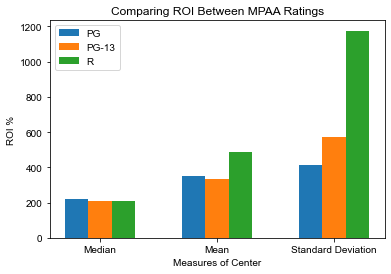

In [52]:
#aggregate graph
# create data
x = np.arange(3)
y1 = list(pg['roi'].agg(['median','mean', 'std']))
y2 = list(pg_13['roi'].agg(['median','mean','std']))
y3 = list(r['roi'].agg(['median','mean','std']))
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x, y2, width)
plt.bar(x+0.2, y3, width)
plt.title('Comparing ROI Between MPAA Ratings')
plt.xticks(x, ['Median', 'Mean', 'Standard Deviation'])
plt.xlabel("Measures of Center")
plt.ylabel("ROI %")
plt.legend(["PG", "PG-13", "R"])
plt.style.use('seaborn-darkgrid')
plt.show()

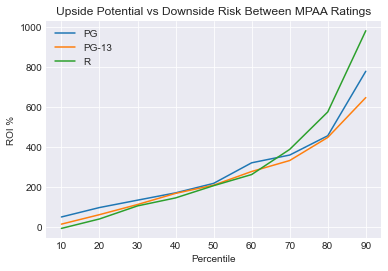

In [76]:
#comparing downside risk
# create data
x = np.arange(9)
percentile = list(range(10, 100, 10))
y1 = [np.percentile(pg['roi'], x) for x in percentile]
y2 = [np.percentile(pg_13['roi'], x) for x in percentile]
y3 = [np.percentile(r['roi'], x) for x in percentile]
  
# plot data in grouped manner of bar type
plt.plot(x, y1, label = 'PG')
plt.plot(x, y2, label = 'PG-13')
plt.plot(x, y3, label = 'R')
plt.title('Upside Potential vs Downside Risk Between MPAA Ratings')
plt.xlabel("Percentile")
plt.ylabel("ROI %")
plt.xticks(x, ['10', '20', '30', '40', '50', '60', '70', '80', '90'])
plt.legend()
plt.style.use('seaborn-darkgrid')
plt.show()